# Data quality checks, preprocessing and EDA

This notebook documents if data used for the reproduction of the paper is of sufficient quality, documents preprocessing steps and exploratory data analysis (EDA). 

Tests used to check the quality are:
- Data availability: are there missing values?
- Document what is the meaning of each of the original columns (also noted in `input_data_notes.md`)

Preprocessing steps:
- Remove columns that are not used in the analysis
- Compute dependent variable and features required for the reproduction of [1] up to the step of generating RFF. RFF are generated in the notebook `02-mz-generate-RFF.ipynb`.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import gmean


# 1. Import data, fix dates

In [87]:
data = pd.read_excel('../data/raw/PredictorData2022.xlsx', sheet_name='Monthly')
data

/home/miroslav/miniforge3/envs/voc/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,yyyymm,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
0,187101,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187102,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187103,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187104,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187105,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,202208,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.042089,-0.029326,0.003349,NaN,-0.040305,-0.042052
1820,202209,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.076885,-0.052554,0.004934,NaN,-0.091495,-0.092876
1821,202210,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.013937,-0.010342,0.006504,NaN,0.080248,0.079196
1822,202211,4080.11,66.387987,177.526667,0.207182,0.0415,0.0490,0.0607,0.0389,-0.017011,0.002900,-0.001010,0.026778,0.051783,0.006343,NaN,0.054166,0.052158


In [88]:
# set `yyyymm` as index and convert it to datetime
dates = pd.to_datetime(data["yyyymm"], format='%Y%m').rename('date')  #.dt.to_period('M') # do not use PeriodIndex, datetime is more informative
data = data.set_index(dates).drop(columns='yyyymm')
data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
date,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.042089,-0.029326,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.076885,-0.052554,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.013937,-0.010342,0.006504,NaN,0.080248,0.079196


We have to check if dates in `date` column corresponds to the end of the month or the beginning of the month. This is important to prevent look-ahead bias. 

Nowhere in the paper by Welch and Goyal could I find this information. Quick and dirty fix is to check if drop during the march 2020 is properly dated. 

In [89]:
plt_data = data.iloc[-40:-30,]
plt_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
date,,,,,,,,,,,,,,,,,
2019-09-01,2976.739990,57.219507,132.900000,0.234770,0.0189,0.0303,0.0391,0.0170,-0.010838,0.0018,0.000783,-0.0192,-0.0190,0.000605,NaN,0.018791,0.017272
2019-10-01,3037.560059,57.559879,135.090000,0.233646,0.0165,0.0301,0.0392,0.0171,-0.013157,0.0015,0.002286,-0.0052,0.0006,0.001510,NaN,0.021621,0.020441
2019-11-01,3140.979980,57.900251,137.280000,0.225274,0.0154,0.0306,0.0394,0.0181,-0.007796,0.0012,-0.000536,-0.0059,0.0014,0.000306,NaN,0.036206,0.033979
2019-12-01,3230.780029,58.240623,139.470000,0.221430,0.0154,0.0301,0.0388,0.0186,-0.007199,0.0014,-0.000910,-0.0253,-0.0089,0.000502,NaN,0.029787,0.028136
2020-01-01,3225.520000,58.687283,131.756667,0.223643,0.0152,0.0294,0.0377,0.0176,-0.007694,0.0013,0.003880,0.0632,0.0519,0.001119,NaN,0.000108,-0.001129
2020-02-01,2954.220000,59.133943,124.043333,0.248698,0.0152,0.0278,0.0361,0.0150,-0.005560,0.0012,0.002741,0.0588,0.0280,0.004777,NaN,-0.081872,-0.084080
2020-03-01,2584.590000,59.580604,116.330000,0.302152,0.0029,0.0302,0.0429,0.0087,-0.007700,0.0012,-0.002176,0.0625,-0.0351,0.073153,NaN,-0.121997,-0.123686
2020-04-01,2912.430000,59.614873,110.630000,0.272011,0.0014,0.0243,0.0413,0.0066,-0.010538,0.0000,-0.006687,0.0082,0.0347,0.014308,NaN,0.128890,0.127654
2020-05-01,3044.310000,59.649142,104.930000,0.260894,0.0013,0.0250,0.0395,0.0067,-0.014967,0.0001,0.000020,-0.0097,0.0084,0.004072,NaN,0.047818,0.045587


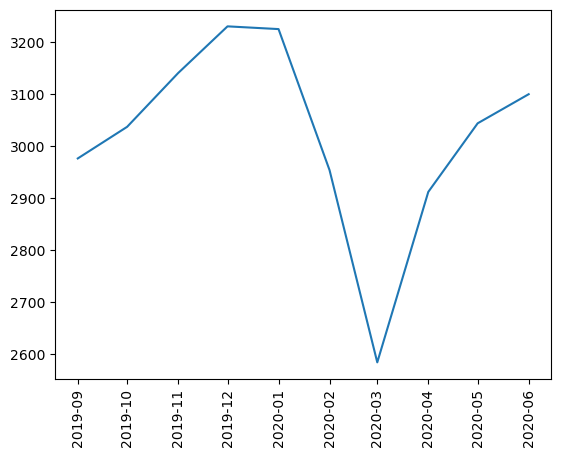

In [90]:
plt.plot(plt_data.index, plt_data['Index'])
plt.xticks(rotation=90);

<div>
<img src="screenshots/spx_covid.png" width="1200"/>
</div>


By comparing two plots, we see that "202003" in the raw dataset corresponds to the value of the index at the end of the month. We will correct that by shifting the date to the end of the month. 

In [91]:
# shift the index of data datafreme by 1 month
data.index = data.index.shift(1, freq='M')

/tmp/ipykernel_1870150/44915820.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.index = data.index.shift(1, freq='M')


In [92]:
data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
date,,,,,,,,,,,,,,,,,
1871-01-31,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-28,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-31,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-30,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-31,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.042089,-0.029326,0.003349,NaN,-0.040305,-0.042052
2022-09-30,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.076885,-0.052554,0.004934,NaN,-0.091495,-0.092876
2022-10-31,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.013937,-0.010342,0.006504,NaN,0.080248,0.079196


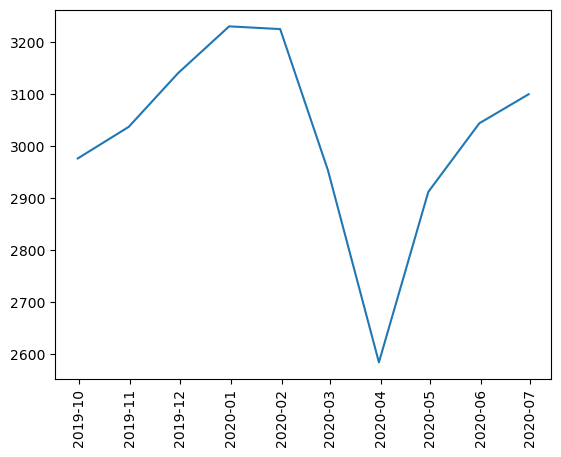

In [93]:
plt_data = data.iloc[-40:-30,]
plt.plot(plt_data.index, plt_data['Index'])
plt.xticks(rotation=90);

# 2. Compute dependent variable used in VoC

### Notes from the VoC paper and Welch and Goyal (WG) paper:

Legend: ✔️ - available from Welch and Goyal (2022) data, ❌ - not available, ❓ - not sure, ❗ - potential problems (e.g. look-ahead bias).

[VoC]: 
- Target `R`: monthly excess return of the CRSP value-weighted index (`R = CRSP_SPvw - Rfree` or `-tbl`. [WG]: The risk-free rate from 1920 to 2005 is the Treasury-bill rate. `Rfree` and `tbl` columns, after annualizing `tbl` do not match but they are very close to each other, where `tbl` appears smoother (see plots below). **I looked at results produced by VoC matlab code, in particular `Y` variable. I get almost perfect matching between my `R` and their `Y` if I use `Rfree` for computing `R`, NOT `tbl`!**
- 15 predictor variables from Welch and Goyal (2008) available monthly over the sample from 1926 to 2020.

[WG]: Our dependent variable is always the equity premium, that is, the total rate of return on the stock market minus the prevailing short-term interest rate. We use S&P 500 index returns from 1926 to 2005 from Center for Research in Security Press (CRSP) **month-end values**. Stock returns are the **continuously compounded** returns on the S&P 500 index, **including dividends**. Risk-free rate is the Treasury-bill rate. 
  - ✔️ `dfy` - Default Yield Spread is the difference between BAA and AAA-rated corporate bond yields. (`dfy = BAA - AAA`) 
  - ✔️ `dfr` - The Default Return Spread is the difference between long-term corporate bond and long-term government bond returns (`dfr = corpr - ltr`).
  - ✔️ `infl` - Inflation is the Consumer Price Index. ❗ Because inflation information is released only in the following month, we **wait for one month before using it** in our monthly regressions
  - ✔️ `svar` - Stock Variance is computed as sum of squared daily returns on the S&P 500.
  - de (Dividend Payout Ratio)
  - ✔️ `lty` - Long-term government bond yield
  - ✔️ `tbl` - Treasury Bills. Treasury-bill rates from 1934 to 2005 are the 3-Month Treasury Bill: Secondary Market Rate from the economic research data base at the Federal Reserve Bank at St. Louis (FRED)
  - ✔️ `ltr` - Long Term Rate of Returns 
  - ✔️ `tms` - The Term Spread is the difference between the long term yield on government bonds and the Treasury-bill. (`tms = lty - tbl`)
  - ✔️  `dp` - Dividend Price Ratio is the difference between the log of dividends and the log of prices. Dividends are 12-month moving sums of dividends paid on the S&P 500 index. (`D12` column). 
  - ✔️ `dy` - The Dividend Yield (d/y) is the difference between the log of dividends and the log of lagged prices. 
  - ✔️ `ep` - Earnings Price Ratio (e/p) is the difference between the log of earnings and the log of prices. Earnings are 12-month moving sums of earnings on the S&P 500 index. (`E12` column).
  - ✔️ `de` Dividend Payout Ratio (d/e) is the difference between the log of dividends and the log of earnings.
  - ✔️ `b/m` - Book-to-Market Ratio is the ratio of book value to market value for the Dow Jones Industrial Average.
  - ✔️ `ntis` - Net Equity Expansion is the ratio of 12-month moving sums of net issues by NYSE listed stocks divided by the total end-of-year market capitalization of NYSE stocks.
  - ✔️ `mr` one lag of the market return - once lagged `CRSP_SPvw`, or `CRSP_SPvwx` if we want to exclude dividends.
  

Data originally from Welch and Goyal (2008) and updated by Goyal (2022):

[A Comprehensive Look at the Empirical Performance of Equity Premium Prediction (with Ivo Welch), July 2008, Review of Financial Studies 21(4) 1455‒1508.](https://drive.google.com/file/d/1uvjBJ9D09T0_sp7kQppWpD-xelJ0KQhc/view)\
    [Original data (up to 2005) used in 2008 paper](https://drive.google.com/file/d/1T0pCslc2vxMDt7EFGI0MJ6mndeQvObBT/view?usp=sharing) \
    [Updated data (up to 2022)](https://docs.google.com/spreadsheets/d/1g4LOaRj4TvwJr9RIaA_nwrXXWTOy46bP/edit?usp=share_link&ouid=113571510202500088860&rtpof=true&sd=true)

All the links are provided on the [Goyal's website](https://sites.google.com/view/agoyal145).

### **Comparison with data used in VoC**
All independent variables, except for `b/m` variable, have a perfect match with my data. The same is true for the returns, i.e. dependent variable. Variable `b/m` is provided directly by Goyal's methodology and it is not altered here. Thus, I can not access where the difference comes from. Note that the authors of VoC used slightly older dataset, so it could be that Goyal and Welch updated the methodology for calculating `b/m` in the meantime.

In [94]:
data["dfy"] = data["BAA"] - data["AAA"]
data["dfr"] = data["corpr"] - data["ltr"]
data["tms"] = data["lty"] - data["tbl"]
data["dp"] = np.log(data["D12"])  - np.log(data["Index"])
data["dy"] = np.log(data["D12"])  - np.log(data["Index"].shift(1))
data["ep"] = np.log(data["E12"]) - np.log(data["Index"])
data["de"] = np.log(data["D12"]) - np.log(data["E12"])
# tbl is yield on 3-month treasury bill, expressed in annual terms. This way we convert it to monthly compounding rate
data["tbill_rfree"] = (1+data.tbl)**(1/12) - 1 
data["mr"] = data["CRSP_SPvw"].shift(1)
data["R"] = data["CRSP_SPvw"] -  data["Rfree"] # excess return 
data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,dfy,dfr,tms,dp,dy,ep,de,tbill_rfree,mr,R
date,,,,,,,,,,,,,,,,,,,,,
1871-01-31,4.44,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-2.837728,NaN,-2.406945,-0.430783,NaN,NaN,NaN
1871-02-28,4.50,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,...,NaN,NaN,NaN,-2.851151,-2.837728,-2.420368,-0.430783,NaN,NaN,NaN
1871-03-31,4.61,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,...,NaN,NaN,NaN,-2.875302,-2.851151,-2.444519,-0.430783,NaN,NaN,NaN
1871-04-30,4.74,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,...,NaN,NaN,NaN,-2.903111,-2.875302,-2.472328,-0.430783,NaN,NaN,NaN
1871-05-31,4.86,0.260000,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,...,NaN,NaN,NaN,-2.928112,-2.903111,-2.497329,-0.430783,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3955.00,64.885405,188.806667,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,...,0.0108,0.012764,0.0027,-4.110113,-4.153480,-3.042012,-1.068101,0.002166,0.093766,-0.042205
2022-09-30,3585.62,65.318305,187.080000,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,...,0.0110,0.024331,0.0039,-4.005414,-4.103464,-2.953150,-1.052264,0.002572,-0.040305,-0.093395
2022-10-31,3871.98,65.853146,182.303333,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,...,0.0116,0.003595,0.0026,-4.074094,-3.997259,-3.055849,-1.018245,0.003048,-0.091495,0.077948


In [95]:
# VoC Y starts at 1927-01-31, ends at 2020-12-31

<Axes: xlabel='date'>

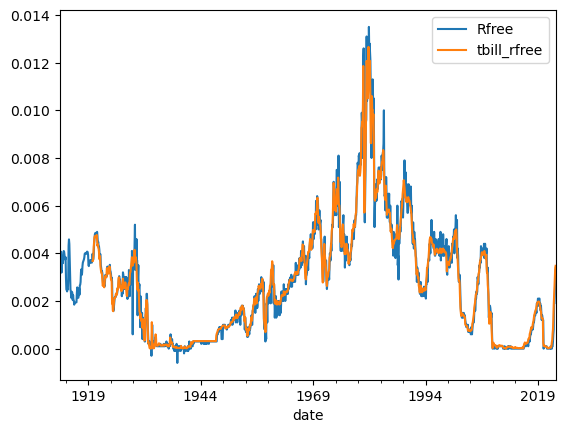

In [96]:
data.iloc[500:].loc[:, ["Rfree", "tbill_rfree"]].plot()

In [97]:
# write data to csv file as interim data
data.to_csv('../data/interim/interim_data_step1.csv')

In the VoC paper, the authors use data in the following timeframe: 1926-2020.
Variables used: dfy, infl, svar, de, lty, tms, tbl, dfr, dp, dy, ltr, ep, b/m, and ntis, as well as one lag of the market return (just CRSP_SPvw or CRSP_SPvwx).

In [98]:
data = data.loc[data.index > dt.datetime(1926, 12, 1)] # nits column is available from "1926-12-31" onwards
data = data.loc[:, ['dfy', 'infl', 'svar', 'de', 'lty', 'tms', 'tbl', 'dfr', 'dp', 'dy', 'ltr', 'ep', 'b/m', 'ntis', 'mr', 'R']].copy()

In [99]:
# write data to csv file as interim data
data.to_csv('../data/interim/interim_data_step2.csv')

## Checks NAs

In [100]:
data.isna().sum() #ok

dfy     0
infl    0
svar    0
de      0
lty     0
tms     0
tbl     0
dfr     0
dp      0
dy      0
ltr     0
ep      0
b/m     0
ntis    0
mr      0
R       0
dtype: int64

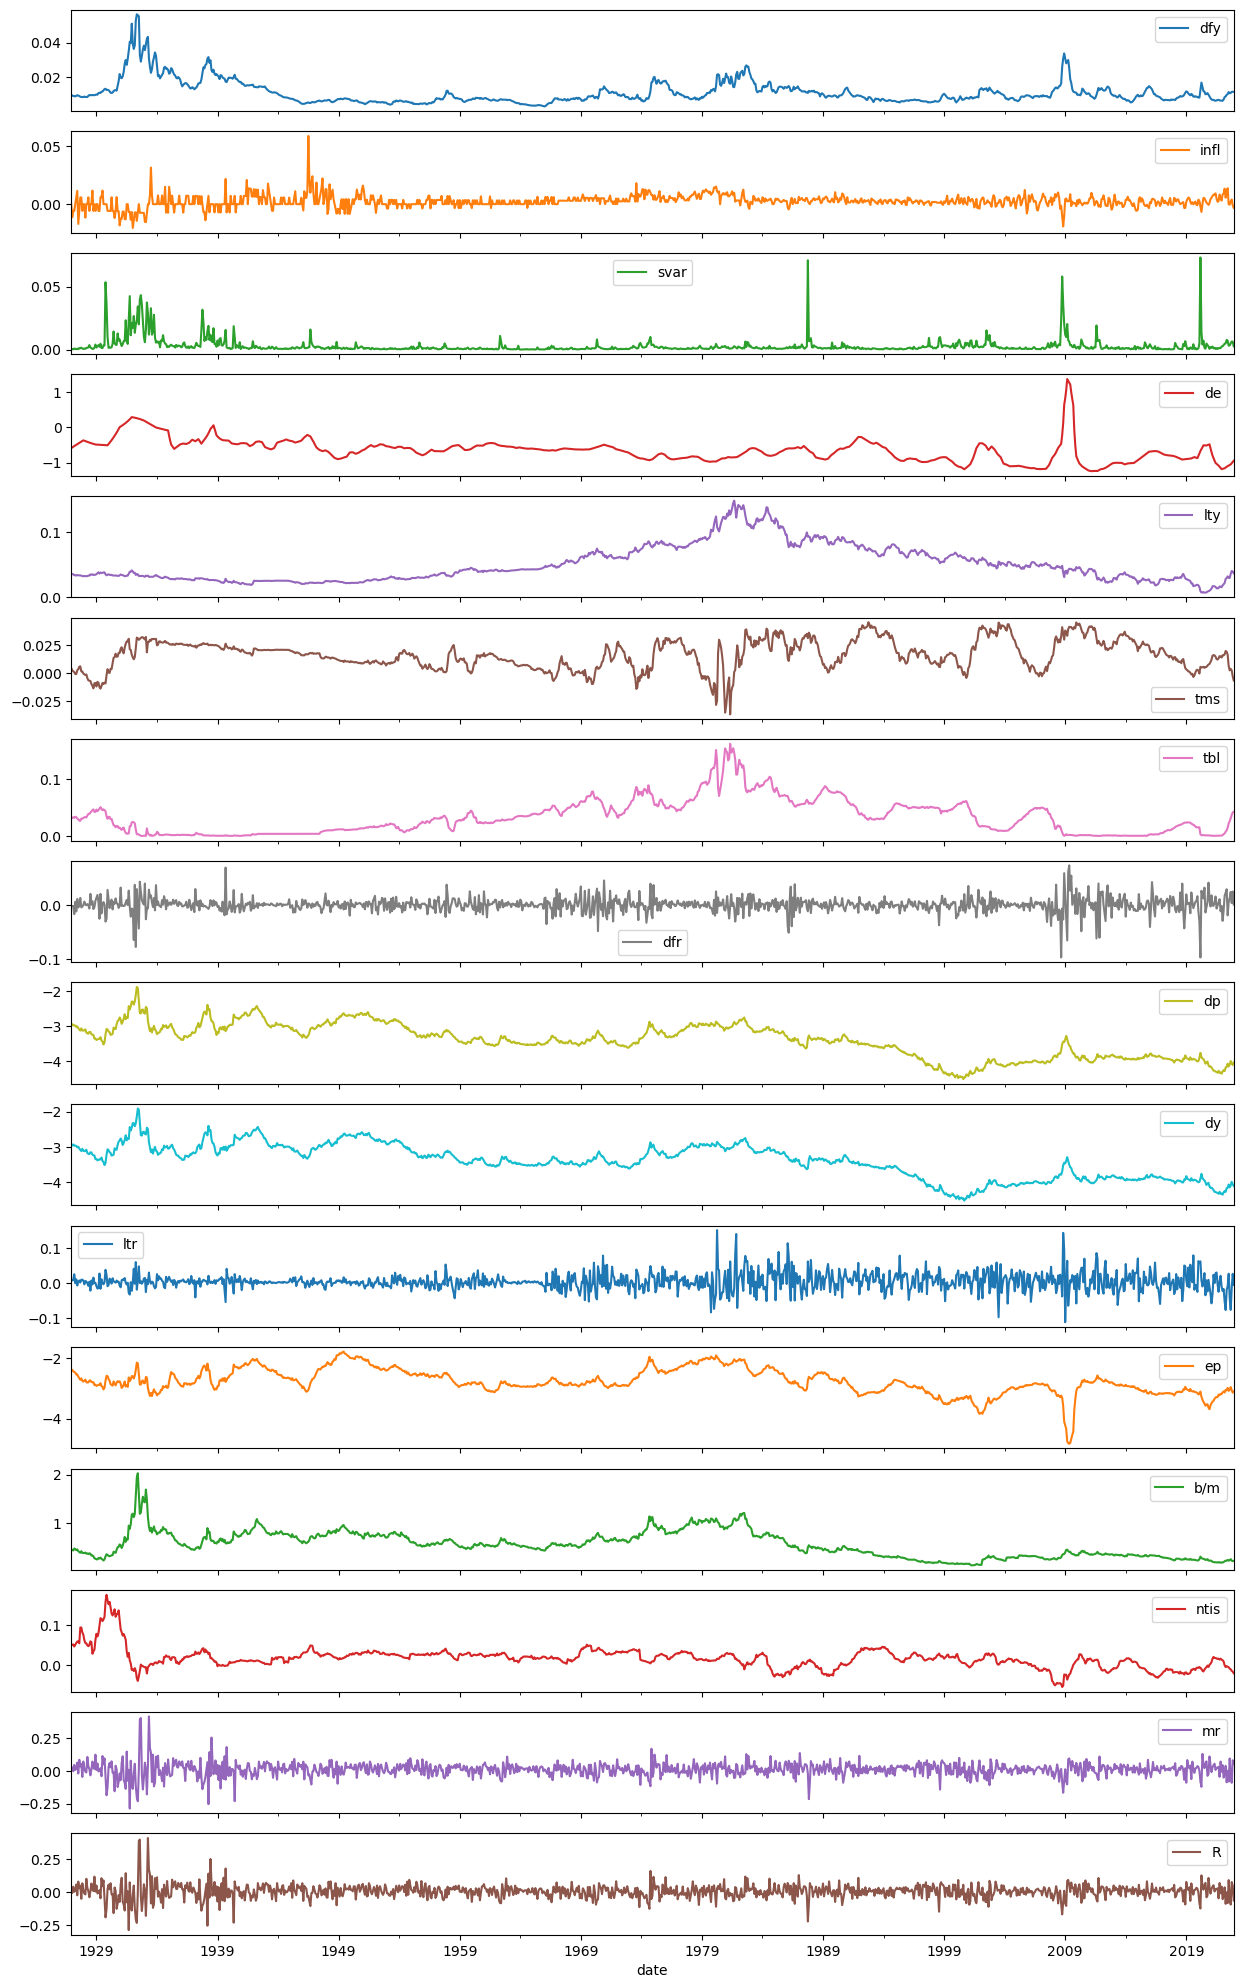

In [101]:
data.plot(subplots=True, figsize=(15, 25));

# 3. Standardization by volatility:

## Notes from VoC
We volatility-standardize returns and predictors using backward-looking standard deviations that preserve the out-of-sample nature of our forecasts. 

Returns are standardized by their trailing 12-month return standard deviation (to capture their comparatively fast-moving conditional volatility). For returns, we calculate standard deviation from the uncentered second moment due to the noisiness of estimating mean monthly returns in short windows. 

$$ \sigma_{t}^{uncent.} = \sqrt{E[R_{t}^2]}$$

In contrast, predictors are standardized using an expanding window historical standard deviation (given the much higher persistence of most predictors). We require 36 months of data to ensure enough stability in our initial predictor standardization, so the final sample we bring to our analysis began in 1930. 

We perform this standardization to align the empirical analysis with our homoskedastic theoretical setting. Our results are insensitive to this step - none of our findings are sensitive to variations in how standardizations are implemented.

In [102]:
# calculate 12 months trailing standard deviation (via non-centered second moment) of returns
sigma_R = (data.R**2).rolling(12).mean().apply(np.sqrt) # checked manually, ok
data['R'] = data['R']/sigma_R
data.iloc[:,:].head(20)

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
date,,,,,,,,,,,,,,,,
1926-12-31,0.0100,0.000000,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.0022,-2.973012,-2.956570,0.0078,-2.386837,0.441476,0.050876,0.026937,NaN
1927-01-31,0.0095,-0.011299,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.0019,-2.942374,-2.963349,0.0075,-2.374773,0.443706,0.050824,0.026047,NaN
1927-02-28,0.0092,-0.005714,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.0019,-2.979535,-2.932946,0.0088,-2.430353,0.428501,0.051668,-0.002910,NaN
1927-03-31,0.0092,-0.005747,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.0170,-2.976535,-2.970053,0.0253,-2.445079,0.469765,0.046357,0.045522,NaN
1927-04-30,0.0090,0.000000,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.0060,-2.984225,-2.967143,-0.0005,-2.471309,0.456754,0.050514,0.007324,NaN
1927-05-31,0.0093,0.005780,0.000392,-0.494518,0.0327,-0.0006,0.0333,-0.0120,-3.025963,-2.975058,0.0109,-2.531446,0.434783,0.055275,0.013021,NaN
1927-06-30,0.0097,0.011494,0.000825,-0.475979,0.0334,0.0027,0.0307,0.0112,-3.007309,-3.016743,-0.0069,-2.531330,0.452385,0.058822,0.062353,NaN
1927-07-31,0.0095,-0.017045,0.000426,-0.457437,0.0333,0.0037,0.0296,-0.0047,-3.061144,-2.998173,0.0050,-2.603707,0.414553,0.059750,-0.020370,NaN
1927-08-31,0.0092,-0.005780,0.001276,-0.439023,0.0329,0.0059,0.0270,0.0007,-3.095764,-3.052225,0.0076,-2.656742,0.396227,0.054522,0.084450,NaN


In [103]:
# calculate expending window standard deviation 
sigma_predictors = data.iloc[:,:-1].expanding(min_periods=36).std() # ok, checked manually
sigma_predictors.head(50)

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr
date,,,,,,,,,,,,,,,
1926-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
data.iloc[:,:-1]= data.iloc[:,:-1]/sigma_predictors
data.head(50)

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
date,,,,,,,,,,,,,,,,
1926-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


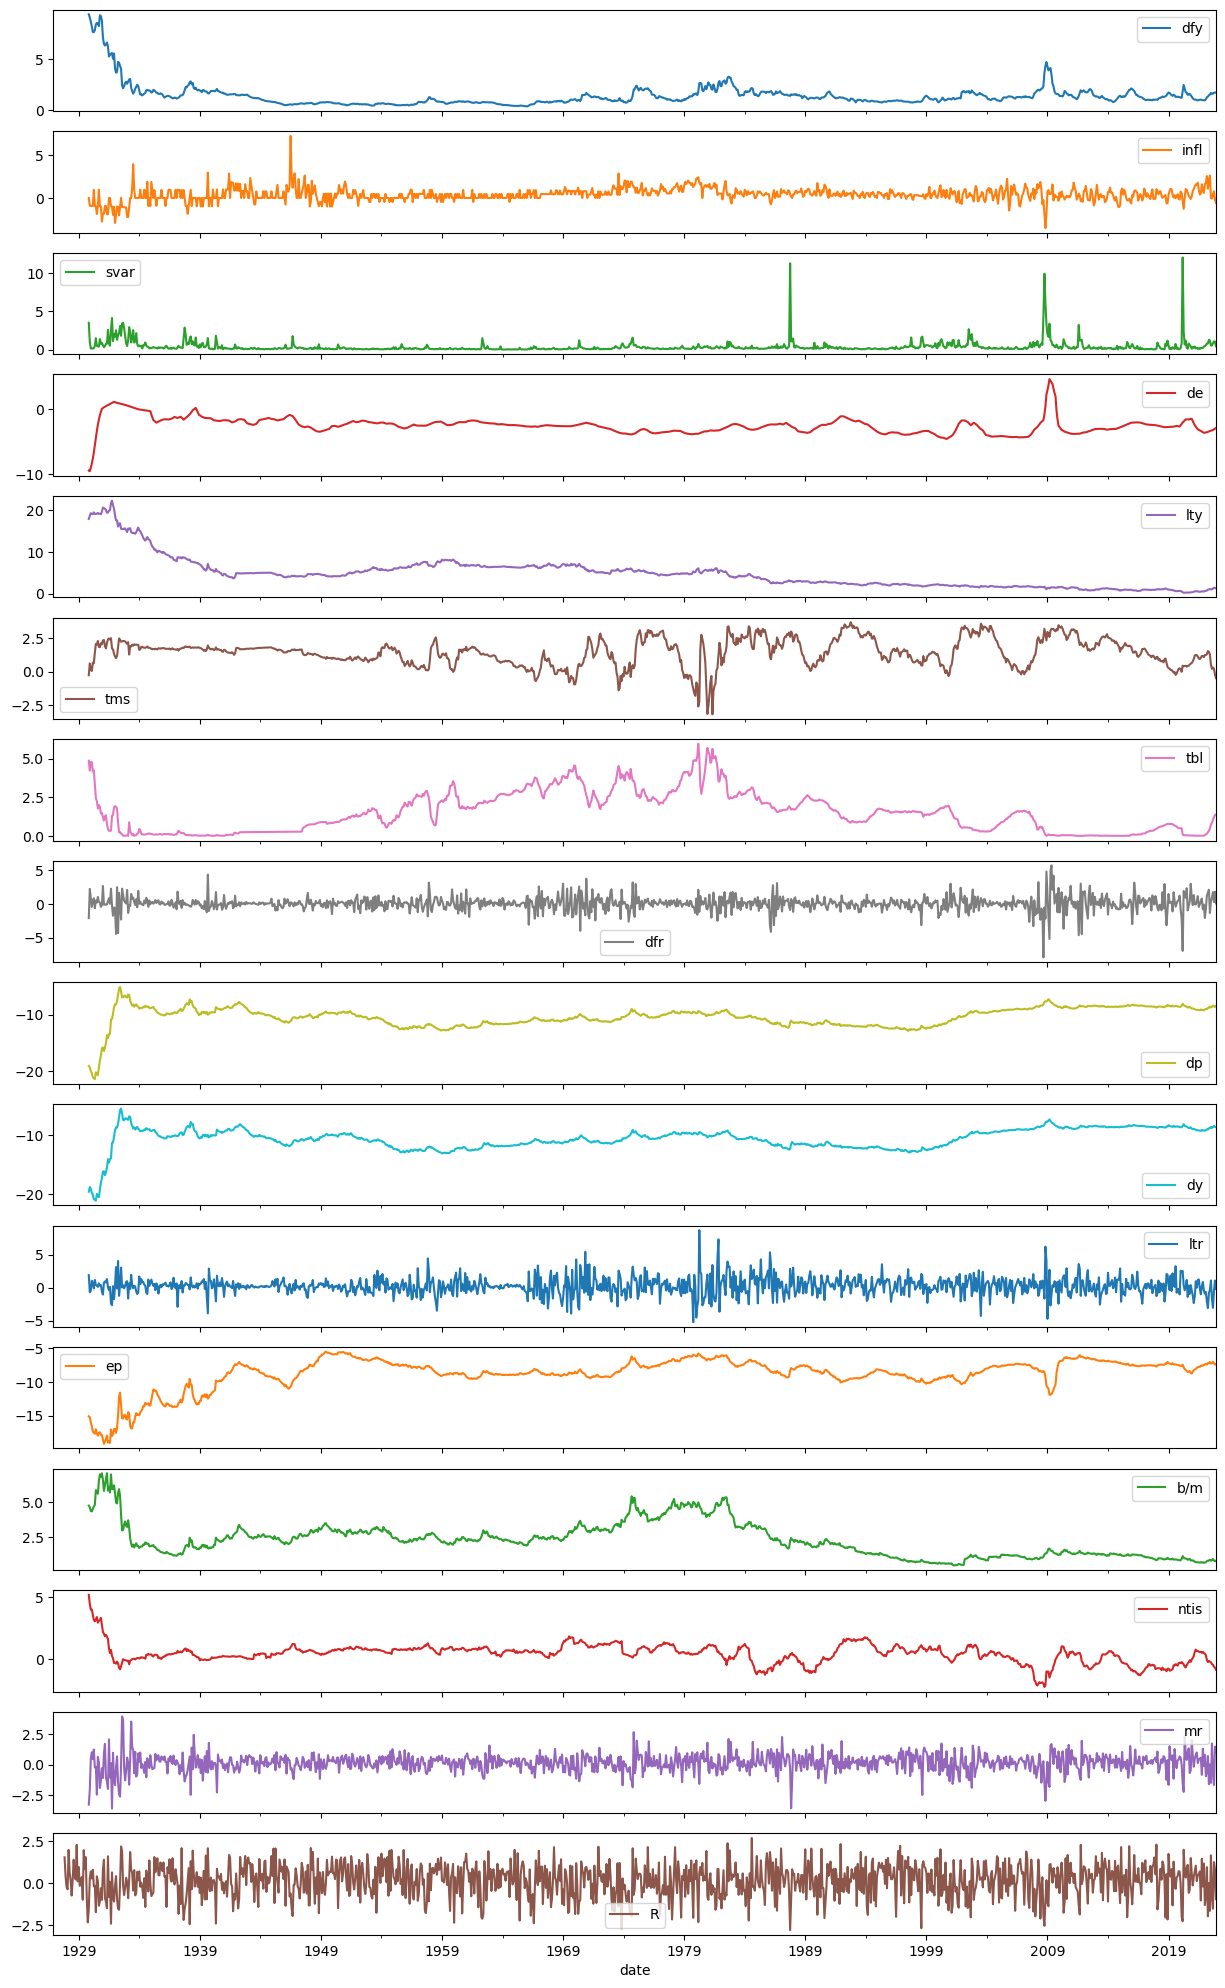

In [105]:
data.plot(subplots=True, figsize=(15, 25));

## Lag dependent variable and inflation 
In the last step we shift dependent variable by one month (look-ahead). We also shift inflation by one month, but in the opposite direction, to prevent look ahead bias.

In [106]:
data["R"] = data["R"].shift(-1) # shift the target variable by -1 month
data["infl"] = data["infl"].shift(1) # shift the inflation by 1 month
data.dropna(inplace=True)

In [111]:
data.tail(40)

,dfy,infl,svar,de,lty,tms,tbl,dfr,dp,dy,ltr,ep,b/m,ntis,mr,R
date,,,,,,,,,,,,,,,,
2019-08-31,1.294563,0.315741,0.757096,-2.610935,0.585476,-0.245851,0.634115,-0.431579,-8.492547,-8.569723,3.246968,-7.424413,0.901772,-0.391902,0.269376,0.326856
2019-09-30,1.280521,-0.009578,0.106195,-2.573175,0.610489,-0.145902,0.614815,0.014636,-8.512964,-8.514049,-0.782220,-7.480424,0.884354,-0.418760,-0.296818,0.417377
2019-10-31,1.324713,0.148153,0.265030,-2.605646,0.613954,0.046062,0.536908,0.424615,-8.541571,-8.536154,-0.211931,-7.490481,0.879908,-0.508300,0.346903,0.714662
2019-11-30,1.281545,0.432520,0.053780,-2.637388,0.649749,0.207262,0.501259,0.534607,-8.598206,-8.564943,-0.240547,-7.532817,0.848143,-0.301202,0.399319,0.678053
2019-12-31,1.267473,-0.101482,0.088221,-2.668423,0.667600,0.245631,0.501403,1.200832,-8.643012,-8.621876,-1.031265,-7.562851,0.833425,-0.278154,0.668916,-0.034006
2020-01-31,1.209642,-0.172217,0.196591,-2.472046,0.631592,0.184203,0.495032,-0.827503,-8.620034,-8.663050,2.570761,-7.695203,0.841519,-0.297279,0.550535,-1.997700
2020-02-29,1.210086,0.734735,0.839496,-2.265391,0.538136,-0.015345,0.495173,-2.251265,-8.413662,-8.640121,2.387713,-7.628798,0.935633,-0.214868,0.001997,-2.261313
2020-03-31,1.852366,0.519239,12.065398,-2.046969,0.311943,0.445068,0.094474,-6.979050,-8.111092,-8.433020,2.532907,-7.462543,1.136756,-0.297588,-1.512597,1.982036
2020-04-30,2.479865,-0.412396,2.357123,-1.892354,0.236490,0.399061,0.045606,1.892798,-8.366171,-8.144112,0.332463,-7.868770,1.023275,-0.407242,-2.249011,0.748585


**Perfect match with preprocessed i.e. standardized data in VoC**

In [108]:
# save to csv 
data.to_csv('../data/processed/processed_data.csv')